In [1]:
import pandas as pd 
import numpy as np
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Deconvolution2D, Conv2DTranspose, MaxPooling2D, UpSampling2D
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
import tensorflow as tf
from tensorflow.keras import layers
keras = tf.keras
AUTOTUNE = tf.data.experimental.AUTOTUNE
from keras.callbacks import TensorBoard
from livelossplot.keras import PlotLossesCallback
import warnings
warnings.filterwarnings("ignore")

from preprocessing import get_images, prep_size_new_data

Using TensorFlow backend.


In [2]:
#matplotlib
import matplotlib.pyplot as plt
font = {'family' : 'serif',
    'sans-serif' : 'Georgia'}
        #'weight' : 'bold'}
# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
# plt.rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})
plt.rc('font', **font)
plt.rcParams["figure.figsize"] = (16,8)

S = 15
M = 18
B = 28

lw =5

plt.rc('font', size      = S)          # controls default text sizes
plt.rc('axes', titlesize = B)     # fontsize of the axes title
plt.rc('axes', labelsize = M)    # fontsize of the x and y labels
plt.rc('xtick', labelsize= S)    # fontsize of the tick labels
plt.rc('ytick', labelsize= S)    # fontsize of the tick labels
plt.rc('legend', fontsize= M)    # legend fontsize
plt.rc('figure', titlesize=B)  # fontsize of the figure title

# linewidth

L = 6

# Colors

C1 = '#144974' #(20,73,116)
C2 = '#0070C0'
C3 = '#A0A0A0'

dash = '--'

# legend locations
ul = 'upper left'
ur = 'upper right'

# plot layout

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0
plt.rcParams['axes.ymargin'] = 0

# grid

plt.rcParams['grid.color'] = 'k'
plt.rcParams['grid.linestyle'] = ':'
plt.rcParams['grid.linewidth'] = 0.5


# Test plot

# plt.plot(np.arange(1,100,1),np.arange(1,100,1), label='Label')
# plt.xlabel('X Label')
# plt.ylabel('Y Label')
# plt.title('Title')
# plt.legend(loc='upper left')
# plt.show()

In [3]:
start = 0
n = 2000
print ('running {} data points.'.format(n))
X_train, X_test, y_train, y_test = get_images(start,n)
Xm_train, Xm_test, ym_train, ym_test, Xf_train, Xf_test, yf_train, yf_test = get_images(start,n, split=True)

running 2000 data points.


# Gender

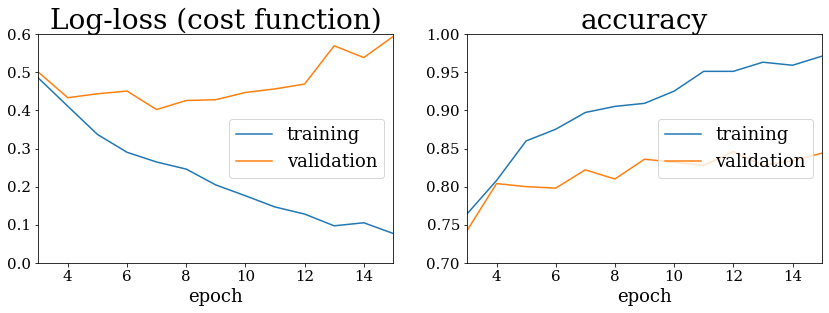

Log-loss (cost function):
training   (min:    0.077, max:    0.668, cur:    0.077)
validation (min:    0.402, max:    0.671, cur:    0.595)

accuracy:
training   (min:    0.595, max:    0.971, cur:    0.971)
validation (min:    0.556, max:    0.846, cur:    0.844)
CPU times: user 17min 9s, sys: 3min 21s, total: 20min 31s
Wall time: 4min 4s


In [4]:
%%time

print('Training gender model! (might take a while)')
cnn_g = Sequential()
input_img = (218, 178, 3)
batch_size=32
epochs=15

# layer 1
cnn_g.add(Conv2D(2, (3, 3), activation='relu', padding='same', input_shape=input_img))
cnn_g.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 2
cnn_g.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_g.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 3
cnn_g.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_g.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_g.add(MaxPooling2D((2, 2), strides=(2,2)))
# flatten and add 3 FC layers
cnn_g.add(Flatten())
cnn_g.add(Dense(64, activation='relu'))
cnn_g.add(Dropout(0.5))
cnn_g.add(Dense(1, activation='sigmoid'))

cnn_g.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_g.fit(X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(X_test, y_test),
        callbacks=[PlotLossesCallback()],
        verbose=1)

In [7]:
cnn_g.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 218, 178, 2)       56        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 218, 178, 2)       38        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 109, 89, 2)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 109, 89, 4)        76        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 109, 89, 4)        148       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 44, 4)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 54, 44, 8)        

# Male Attraction

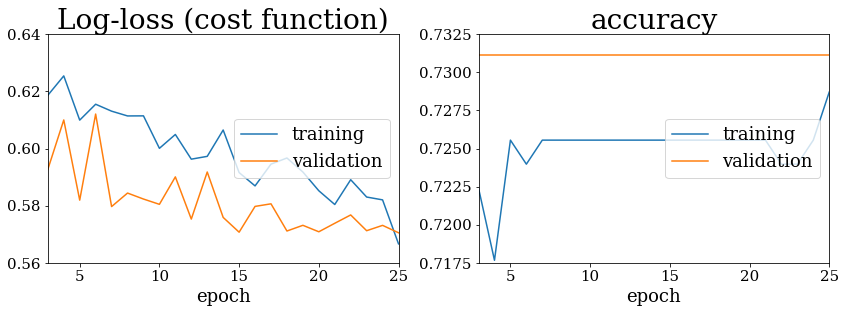

Log-loss (cost function):
training   (min:    0.567, max:    0.649, cur:    0.567)
validation (min:    0.571, max:    0.612, cur:    0.571)

accuracy:
training   (min:    0.703, max:    0.729, cur:    0.729)
validation (min:    0.731, max:    0.731, cur:    0.731)
CPU times: user 11min 6s, sys: 1min 42s, total: 12min 49s
Wall time: 2min 45s


In [5]:
%%time

print('Training gender model! (might take a while)')
cnn_m = Sequential()
input_img = (218, 178, 3)
batch_size=32
epochs=25

# layer 1
cnn_m.add(Conv2D(2, (3, 3), activation='relu', padding='same', input_shape=input_img))
cnn_m.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
cnn_m.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 2
cnn_m.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_m.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_m.add(MaxPooling2D((2, 2), strides=(2,2)))
# flatten and add 3 FC layers
cnn_m.add(Flatten())
cnn_m.add(Dense(64, activation='relu'))
cnn_m.add(Dropout(0.5))
cnn_m.add(Dense(32, activation='relu'))
cnn_m.add(Dropout(0.5))
cnn_m.add(Dense(1, activation='sigmoid'))

cnn_m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_m.fit(Xm_train, ym_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(Xm_test, ym_test),
        callbacks=[PlotLossesCallback()],
        verbose=1)

In [8]:
cnn_m.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 218, 178, 2)       56        
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 218, 178, 2)       38        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 109, 89, 2)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 89, 4)        76        
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 109, 89, 4)        148       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 44, 4)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9504)             

# Female Attraction

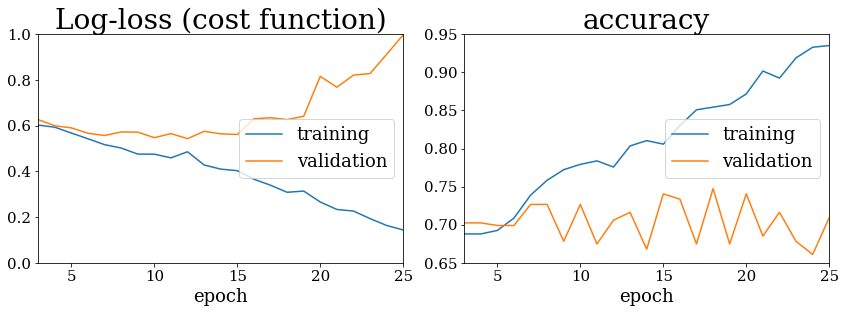

Log-loss (cost function):
training   (min:    0.144, max:    0.637, cur:    0.144)
validation (min:    0.543, max:    0.998, cur:    0.998)

accuracy:
training   (min:    0.676, max:    0.935, cur:    0.935)
validation (min:    0.661, max:    0.747, cur:    0.709)
CPU times: user 16min 21s, sys: 3min 9s, total: 19min 30s
Wall time: 4min 6s


In [6]:
%%time

print('Training gender model! (might take a while)')
cnn_f = Sequential()
input_img = (218, 178, 3)
batch_size=32
epochs=25

# layer 1
cnn_f.add(Conv2D(2, (3, 3), activation='relu', padding='same', input_shape=input_img))
cnn_f.add(Conv2D(2, (3, 3), activation='relu', padding='same'))
cnn_f.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 2
cnn_f.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_f.add(Conv2D(4, (3, 3), activation='relu', padding='same'))
cnn_f.add(MaxPooling2D((2, 2), strides=(2,2)))
# layer 3
cnn_f.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_f.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
cnn_f.add(MaxPooling2D((2, 2), strides=(2,2)))
# flatten and add 3 FC layers
cnn_f.add(Flatten())
cnn_f.add(Dense(64, activation='relu'))
cnn_f.add(Dropout(0.5))
cnn_f.add(Dense(1, activation='sigmoid'))

cnn_f.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_f.fit(Xf_train, yf_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(Xf_test, yf_test),
        callbacks=[PlotLossesCallback()],
        verbose=1)

In [9]:
cnn_f.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 218, 178, 2)       56        
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 218, 178, 2)       38        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 109, 89, 2)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 109, 89, 4)        76        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 109, 89, 4)        148       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 44, 4)         0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 54, 44, 8)        

In [ ]:
Xm_train, Xm_test, ym_train, ym_test, Xf_train, Xf_test, yf_train, yf_test = male_female_split(full_images, df)

In [ ]:
from preprocessing import get_and_clean_data

In [ ]:
full_images, df = get_and_clean_data(0,50)

In [ ]:
df[df.male==1].index

In [ ]:
full_images[df[df.male==1].index]

In [ ]:
full_images[1]

In [ ]:
cnn_g = load_model('../saved_models/gender2_11_10.h5')
cnn_m = load_model('../saved_models/male2_att_11_10.h5')
cnn_f = load_model('../saved_models/female2_att_11_10.h5')

In [ ]:
n=4
X = prep_size_new_data(n-1,n)
pred = cnn_g.predict_proba(X)
print('By Western standards, the picture you submitted is {} a male. (scale: 0-1)'.format(pred[0]))
cnn_g.predict_classes(X)[0][0]

In [ ]:
cnn_g = load_model('../saved_models/gender4_11_10.h5')
cnn_g.evaluate(X_train, y_train)

In [ ]:
cnn_m = load_model('../saved_models/male_att_11_10.h5')
boy1 = cnn_m.evaluate(Xf_train, yf_train)
cnn_m = load_model('../saved_models/male2_att_11_10.h5')
boy2 = cnn_m.evaluate(Xf_train, yf_train)
cnn_m = load_model('../saved_models/male3_att_11_10.h5')
boy3 = cnn_m.evaluate(Xf_train, yf_train)
cnn_m = load_model('../saved_models/male4_att_11_10.h5')
boy4 = cnn_m.evaluate(Xf_train, yf_train)
print(boy1, boy2, boy3, boy4)

In [ ]:
cnn_f = load_model('../saved_models/female_att_11_10.h5')
girl1 = cnn_f.evaluate(Xf_train, yf_train)
cnn_f = load_model('../saved_models/female2_att_11_10.h5')
girl2 = cnn_f.evaluate(Xf_train, yf_train)
cnn_f = load_model('../saved_models/female3_att_11_10.h5')
girl3 = cnn_f.evaluate(Xf_train, yf_train)
cnn_f = load_model('../saved_models/female4_att_11_10.h5')
girl4 = cnn_f.evaluate(Xf_train, yf_train)
print(girl1, girl2, girl3, girl4)

In [ ]:
print(girl1, girl2, girl3, girl4)